In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
obs_rf = pd.read_csv("observations_rf.csv")
obs_lgbm = pd.read_csv("observations_lgbm.csv")
obs_random = pd.read_csv("observations_random.csv")

In [53]:
def add_cols(df):
    df['correct'] = (df['winner'].astype(str) == df['predicted_winner'].astype(str))*1

    def eval_odds(x):
        if isinstance(x, int) or isinstance(x, float):
            return float(x)
        if "/" in x:
            parts = x.split("/")
            return float(parts[0]) / float(parts[1])
        return float(x)
    df['odds_decimal'] = df['winner_odds'].apply(lambda x: eval_odds(x))

    def eval_return(x):
        if isinstance(x, int) or isinstance(x, float):
            return float(x)
        if "/" in x:
            parts = x.split("/")
            return (float(parts[0]) + float(parts[1])) / float(parts[1])
        return float(x)
    df['returns_decimal'] = df['winner_odds'].apply(lambda x: eval_return(x))
    
    df['race_return'] = df['correct'] * df['returns_decimal']
add_cols(obs_rf)
add_cols(obs_lgbm)
add_cols(obs_random)

## Returns based on number of horses in a race

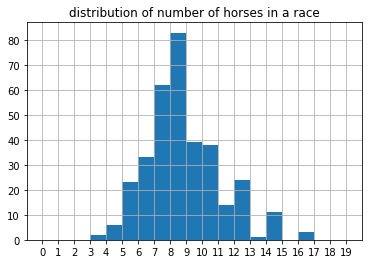

In [54]:
plt.hist(obs_rf['num_horses'], bins=range(20))
plt.title('distribution of number of horses in a race')
plt.xticks(range(20))
plt.grid()
plt.show()

I get a 5% improvement from only predicting races with 6 to 9 horses, inclusive. This is fine since more of the races have 6 to 9 horses.

However, returns should be higher on races with more horses, so I should measure average odds for each number of horses to see which number of horses is the most profitable.

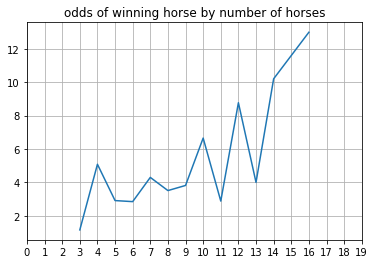

In [55]:
odds_by_num_horses = obs_rf.groupby(['num_horses']).mean()
plt.plot(odds_by_num_horses.index, odds_by_num_horses['odds_decimal'])
plt.title('odds of winning horse by number of horses')
plt.xticks(range(20))
plt.grid()
plt.show()

As expected, the odds of the winner increase when the number of horses in the race increases. Let's see how the returns look by number of horses.

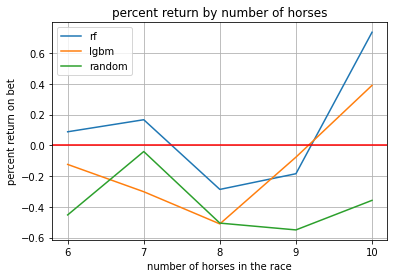

In [61]:
def plot_return_by_num_horses(dfs, labels):
    x_low, x_high = 6, 11
    offset = 3
    
    for df, label in zip(dfs, labels):
        returns = df.groupby(['num_horses']).mean()
        plt.plot(returns.index[x_low-offset:x_high-offset], returns['race_return'][x_low-offset:x_high-offset]-1, label=label)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('percent return by number of horses')
    plt.xticks(range(x_low,x_high))
    plt.xlabel('number of horses in the race')
    plt.ylabel('percent return on bet')
    plt.legend()
    plt.grid()
    plt.show()
    
plot_return_by_num_horses([obs_rf, obs_lgbm, obs_random], ['rf','lgbm','random'])

## Plots based on confidence

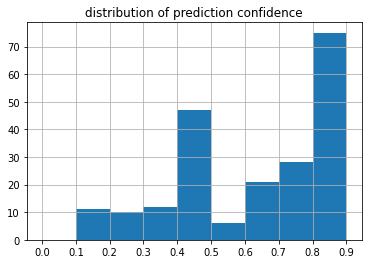

In [57]:
plt.hist(obs_rf['confidence'], bins=np.arange(0,1,0.1))
plt.title('distribution of prediction confidence')
plt.xticks(np.arange(0,1,0.1))
plt.grid()
plt.show()

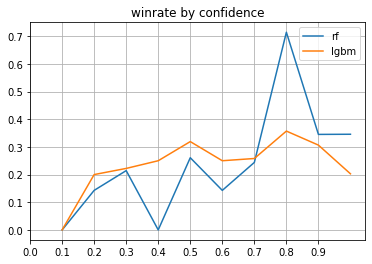

In [58]:
def plot_winrate_by_confidence(dfs, labels):
    for df, label in zip(dfs, labels):
        df['rounded_confidence'] = np.round(df['confidence']*10)/10
        wr_conf = df.groupby(['rounded_confidence']).mean()
        plt.plot(wr_conf.index, wr_conf['correct'], label=label)
    plt.title('winrate by confidence')
    plt.xticks(np.arange(0,1,0.1))
    plt.grid()
    plt.legend()
    plt.show()
    
plot_winrate_by_confidence([obs_rf, obs_lgbm], ['rf','lgbm'])

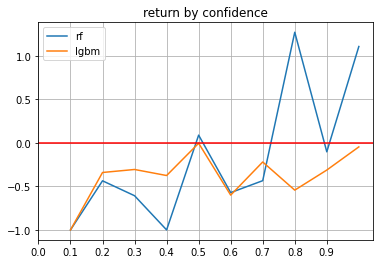

In [59]:
def plot_return_by_confidence(dfs, labels):
    for df, label in zip(dfs, labels):
        df['rounded_confidence'] = np.round(df['confidence']*10)/10
        wr_conf = df.groupby(['rounded_confidence']).mean()
        plt.plot(wr_conf.index, wr_conf['race_return']-1, label=label)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('return by confidence')
    plt.xticks(np.arange(0,1,0.1))
    plt.grid()
    plt.legend()
    plt.show()
    
plot_return_by_confidence([obs_rf, obs_lgbm], ['rf','lgbm'])